# Orbit games

We consider energy plots and orbital solutions in polar coordinates for the general potential energy

$\begin{align}
   U(r) = k r^n
\end{align}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [3]:
class Orbit:
    """
    Potentials and associated differential equations for central force motion
    with the potential U(r) = k r^n.
    """
    
    def __init__(self, ang_mom, n, k=1, mu=1):
        self.ang_mom = ang_mom
        self.n = n
        self.k = k
        self.mu = mu
    
    def U(self, r):
        """Potential energy of the form U = kr^n."""
        return self.k * r**self.n
    
    def Ucf(self, r):
        """Centrifugal potential energy"""
        return self.ang_mom**2 / (2. * self.mu * r**2)
    
    def Ueff(self, r):
        """Effective potential energy"""
        return self.U(r) + self.Ucf(r)
    
    def U_deriv(self, r):
        """dU/dr"""
        return self.n * self.k * r**(self.n - 1)
        
    def Ucf_deriv(self, r):
        """dU_cf/dr"""
        return -2. * self.ang_mom**2 / (2. * self.mu * r**3)
        
    def Ueff_deriv(self, r):
        """dU_eff/dr"""
        return self.U_deriv(r) + self.Ucf_deriv(r)
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dr/dt d^2r/dt^2 dphi/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            3-component vector with y[0] = r(t), y[1] = dr/dt, y[2] = dphi/dt
            
        """
        return [ y[1], 
                -1./self.mu * self.Ueff_deriv(y[0]), 
                self.ang_mom / (self.mu * y[0]**2) ]
    
    
    def solve_ode(self, t_pts, r_0, r_dot_0, phi_0, 
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [r_0, r_dot_0, phi_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        r, r_dot, phi = solution.y
        return r, r_dot, phi
    
    def energy(self, t_pts, r, r_dot):
        """Evaluate the energy as a function of time"""
        return (self.mu/2.) * r_dot**2 + self.Ueff(r)

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# Gravity $n = -1$

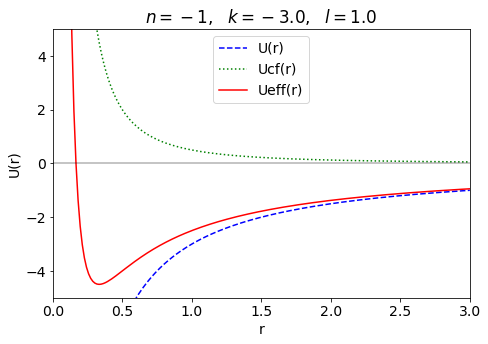

In [5]:
n = -1
k = -3. 
ang_mom = 1. 
o1 = Orbit(ang_mom, n=n, k=k, mu=1)

fig_2 = plt.figure(figsize=(7,5))
ax_2 = fig_2.add_subplot(1,1,1)

r_pts = np.linspace(0.001, 3., 200)
U_pts = o1.U(r_pts)
Ucf_pts = o1.Ucf(r_pts)
Ueff_pts = o1.Ueff(r_pts)

ax_2.plot(r_pts, U_pts, linestyle='dashed', color='blue', label='U(r)')
ax_2.plot(r_pts, Ucf_pts, linestyle='dotted', color='green', label='Ucf(r)')
ax_2.plot(r_pts, Ueff_pts, linestyle='solid', color='red', label='Ueff(r)')

ax_2.set_xlim(0., 3.)
ax_2.set_ylim(-5., 5.)
ax_2.set_xlabel('r')
ax_2.set_ylabel('U(r)')
ax_2.set_title(f'$n = {n},\ \ k = {k},\ \  l = {ang_mom}$')
ax_2.legend(loc='upper center')

ax_2.axhline(0., color='black', alpha=0.3)

fig_2.tight_layout()

fig_2.savefig('Gravitation_orbit_1.png')


## Orbit (time dependence)

We'll directly solve the equations for r(t) and phi(t).

In [6]:
# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
r_0 = 1.
r_dot_0 = 0.
phi_0 = 0.0
r_pts, r_dot_pts, phi_pts = o1.solve_ode(t_pts, r_0, r_dot_0, phi_0)

c = o1.ang_mom**2 / (np.abs(o1.k) * o1.mu)
epsilon = c / r_0 - 1.
energy_0 = o1.mu/2. * r_dot_0**2 + o1.Ueff(r_0)
print(f'energy = {energy_0:.2f}')
print(f'eccentricity = {epsilon:.2f}')

energy = -2.50
eccentricity = -0.67


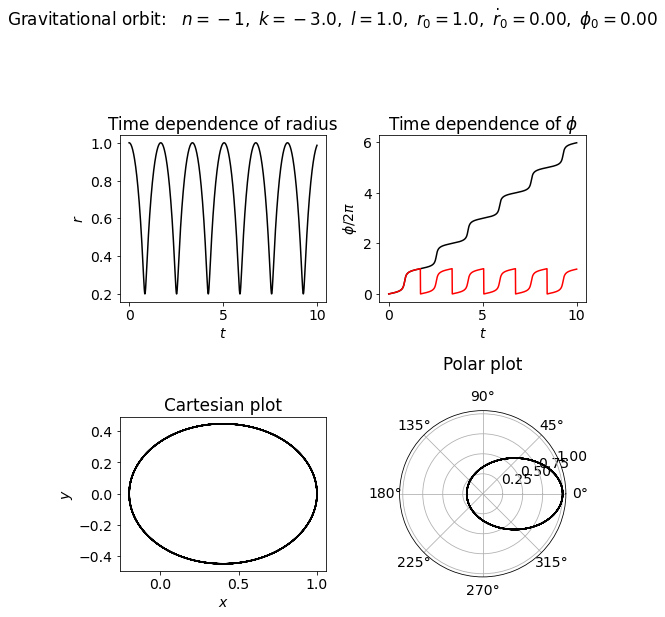

In [7]:
fig_4 = plt.figure(figsize=(8,8))

overall_title = 'Gravitational orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.2f},$' + \
                rf' $\phi_0 = {phi_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_4.suptitle(overall_title, va='baseline')

ax_4a = fig_4.add_subplot(2,2,1)
ax_4a.plot(t_pts, r_pts, color='black')
ax_4a.set_xlabel(r'$t$')
ax_4a.set_ylabel(r'$r$')
ax_4a.set_title('Time dependence of radius')

ax_4b = fig_4.add_subplot(2,2,2)
ax_4b.plot(t_pts, phi_pts/(2.*np.pi), color='black')
ax_4b.plot(t_pts, phi_pts/(2.*np.pi)%1, color='red')
ax_4b.set_xlabel(r'$t$')
ax_4b.set_ylabel(r'$\phi/2\pi$')
ax_4b.set_title(r'Time dependence of $\phi$')

ax_4c = fig_4.add_subplot(2,2,3)
ax_4c.plot(r_pts*np.cos(phi_pts), r_pts*np.sin(phi_pts), color='black')
ax_4c.set_xlabel(r'$x$')
ax_4c.set_ylabel(r'$y$')
ax_4c.set_aspect(1)
ax_4c.set_title('Cartesian plot')

ax_4d = fig_4.add_subplot(2,2,4, polar=True)
ax_4d.plot(phi_pts, r_pts, color='black')
ax_4d.set_title('Polar plot', pad=20.)


fig_4.tight_layout()



## Energy versus time

In [8]:
E_tot_pts = o1.energy(t_pts, r_pts, r_dot_pts)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

print(f'    t        E_tot        rel. error')
for t, E_tot, E_tot_rel in zip(t_pts, E_tot_pts, E_tot_rel_pts):
    print(f'{t:8.5f}  {E_tot:8.5e}  {E_tot_rel:12.4e}')

    t        E_tot        rel. error
 0.00000  -2.50000e+00    0.0000e+00
 0.01000  -2.50000e+00    3.9790e-14
 0.02000  -2.50000e+00    5.4987e-11
 0.03000  -2.50000e+00    2.2135e-10
 0.04000  -2.50000e+00    2.8173e-10
 0.05000  -2.50000e+00    1.1803e-10
 0.06000  -2.50000e+00    1.1083e-10
 0.07000  -2.50000e+00    1.6178e-10
 0.08000  -2.50000e+00    5.9066e-12
 0.09000  -2.50000e+00    2.3637e-10
 0.10000  -2.50000e+00    2.2980e-10
 0.11000  -2.50000e+00    5.2911e-11
 0.12000  -2.50000e+00    3.2821e-10
 0.13000  -2.50000e+00    3.1704e-10
 0.14000  -2.50000e+00    5.3087e-11
 0.15000  -2.50000e+00    3.2847e-10
 0.16000  -2.50000e+00    1.5683e-10
 0.17000  -2.50000e+00    3.1309e-10
 0.18000  -2.50000e+00    6.0824e-10
 0.19000  -2.50000e+00    4.6531e-10
 0.20000  -2.50000e+00    2.7574e-10
 0.21000  -2.50000e+00    5.8478e-10
 0.22000  -2.50000e+00    6.9095e-11
 0.23000  -2.50000e+00    7.3493e-10
 0.24000  -2.50000e+00    1.0180e-09
 0.25000  -2.50000e+00    6.7889e-10
 

/var/folders/_s/v5m4jp4x2y332nzvt9zn1qxr0000gn/T/ipykernel_28021/937959986.py:15: RuntimeWarning: invalid value encountered in reciprocal
  return self.k * r**self.n


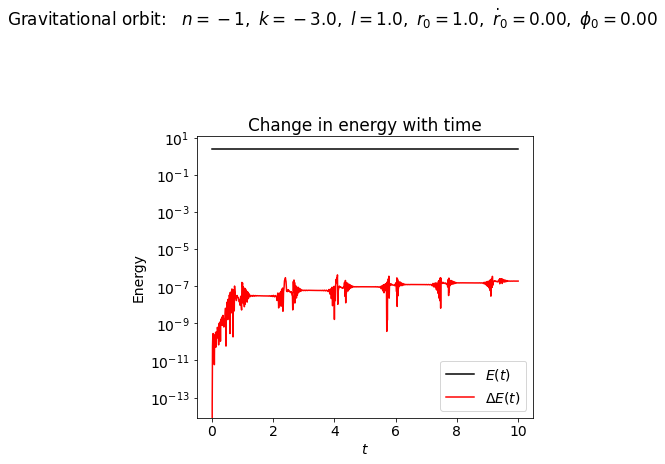

In [9]:
fig_5 = plt.figure(figsize=(6,6))

overall_title = 'Gravitational orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.2f},$' + \
                rf' $\phi_0 = {phi_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_5.suptitle(overall_title, va='baseline')

ax_5a = fig_5.add_subplot(1,1,1)
ax_5a.semilogy(t_pts, np.abs(E_tot_pts), color='black', label=r'$E(t)$')
ax_5a.semilogy(t_pts, E_tot_rel_pts, color='red', label=r'$\Delta E(t)$')
ax_5a.set_xlabel(r'$t$')
ax_5a.set_ylabel(r'Energy')
ax_5a.set_title('Change in energy with time')
ax_5a.legend(loc='lower right')

fig_5.tight_layout()

## Verifying the virial theorem numerically

First a quick calculation with the current orbit:

In [10]:
t_range = t_pts[-1] - t_pts[0]
U_pts = o1.U(r_pts)
T_pts = o1.energy(t_pts, r_pts, r_dot_pts) - U_pts

/var/folders/_s/v5m4jp4x2y332nzvt9zn1qxr0000gn/T/ipykernel_28021/937959986.py:15: RuntimeWarning: invalid value encountered in reciprocal
  return self.k * r**self.n


In [11]:
from scipy.integrate import simps

In [12]:
T_avg = simps(T_pts, t_pts, delta_t) / t_range
U_avg = simps(U_pts, t_pts, delta_t) / t_range
print(f'<T> = {T_avg:.6f}, <U> = {U_avg:.6f}, n<U>/2 = {o1.n*U_avg/2:.6f}')

<T> = 2.522990, <U> = -5.022990, n<U>/2 = 2.511495


Now a more complete study with different $n$ values and varying integration times:

In [13]:
from scipy.integrate import simps

# For simplicity, set the angular momentum to 1 and k to +2 or -2 with n*k > 0 
n_values = (-1, 2, 3, 4, 7)   # different n values to test
t_end_values = (10., 100., 1000.)  # integration max values to test
k_magnitude = 2.

# Time start and spacing
t_start = 0.
delta_t = 0.001

# Initial conditions
r_0 = 1.
r_dot_0 = 0.
phi_0 = 0.0
ang_mom = 1.

print(f' n    t_end     <T>        <U>        n<U>/2     |<T>-n<U>/2|/<T>')
for n in n_values:
    k = np.sign(n) * k_magnitude   # ensure that n*k > 0
    o_now = Orbit(ang_mom, n=n, k=k, mu=1.)  # current orbit 
    for t_end in t_end_values:
        t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
        r_pts, r_dot_pts, phi_pts = o_now.solve_ode(t_pts, r_0, 
                                                    r_dot_0, phi_0)

        t_range = t_pts[-1] - t_pts[0]
        # Generate the integrands to be averaged
        U_pts = o_now.U(r_pts)
        T_pts = o_now.energy(t_pts, r_pts, r_dot_pts) - U_pts
        # Calculate the time averages from 0 to t_end
        T_avg = simps(T_pts, t_pts, delta_t) / t_range
        U_avg = simps(U_pts, t_pts, delta_t) / t_range

        rel_error = np.fabs((T_avg - n*U_avg/2.) / T_avg)
        print(f'{n:2.0f}   {t_end:5.0f}   {T_avg:9.6f}  {U_avg:9.6f} ',
              f' {n*U_avg/2.:9.6f}       {rel_error:9.3e}')

/var/folders/_s/v5m4jp4x2y332nzvt9zn1qxr0000gn/T/ipykernel_28021/937959986.py:15: RuntimeWarning: invalid value encountered in reciprocal
  return self.k * r**self.n


 n    t_end     <T>        <U>        n<U>/2     |<T>-n<U>/2|/<T>
-1      10    1.468564  -2.968564    1.484282       1.070e-02
-1     100    1.494275  -2.994275    1.497137       1.915e-03
-1    1000    1.499960  -2.999956    1.499978       1.197e-05
 2      10    1.236029   1.263971    1.263971       2.261e-02
 2     100    1.251595   1.248404    1.248404       2.550e-03
 2    1000    1.250122   1.249865    1.249865       2.050e-04
 3      10    1.512491   0.987509    1.481264       2.065e-02
 3     100    1.498214   1.001784    1.502676       2.978e-03
 3    1000    1.500149   0.999830    1.499745       2.695e-04
 4      10    1.665613   0.834386    1.668773       1.897e-03
 4     100    1.668070   0.831928    1.663856       2.526e-03
 4    1000    1.666828   0.833147    1.666295       3.196e-04
 7      10    1.954318   0.545682    1.909887       2.273e-02
 7     100    1.943101   0.556897    1.949141       3.109e-03
 7    1000    1.944343   0.555637    1.944731       1.994e-04
